In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

dataFile = pd.read_csv('dataFiles/Fu_multifit.csv')
X = np.array([dataFile['Velocity'],dataFile['L/S']]).T
Y = np.array(dataFile['contact ratio']) / 100

In [2]:
reg = LinearRegression().fit(X,Y)
print(reg.score(X,Y))
reg.coef_

0.8993282506860828


array([0.02007223, 0.21724281])

In [3]:
X1 = [[2.5,0.08]]
plastic = reg.predict(X1)
print(plastic)

[0.05952281]


In [4]:
ratio = plastic/(1-plastic)
print(ratio)
print(reg.predict(X[0:7,:]))

[0.06329001]
[0.18852183 0.21256833 0.25302754 0.30056782 0.31830947 0.34569337
 0.37878411]


Text(0, 0.5, 'Contact ratio')

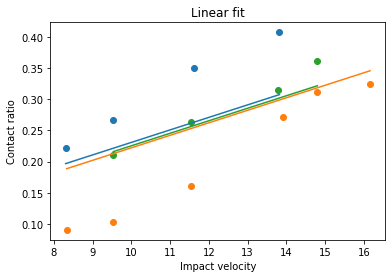

In [5]:
import matplotlib.pyplot as plt 
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],reg.predict(X[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],reg.predict(X[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],reg.predict(X[8:12,:]))
plt.title('Linear fit')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [6]:
#polynomial regression fit
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=False)
X_poly = poly.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf = LinearRegression()
clf.fit(X_poly,Y)
mul_coeff = clf.coef_
print(clf.score(X_poly,Y))
print(mul_coeff)

0.9919677571129205
[ 0.00000000e+00  1.70578279e-02 -4.28364632e+00 -3.50458587e-04
  1.64273909e-01  2.00403193e+01]


Text(0, 0.5, 'Contact ratio')

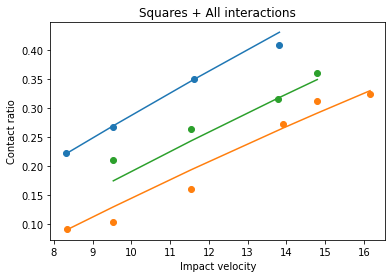

In [7]:
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf.predict(X_poly[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf.predict(X_poly[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf.predict(X_poly[8:12,:]))
plt.title('Squares + All interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

0.9890250440724381
[ 0.         -0.0267725  -0.92390284  0.40204208]


Text(0, 0.5, 'Contact ratio')

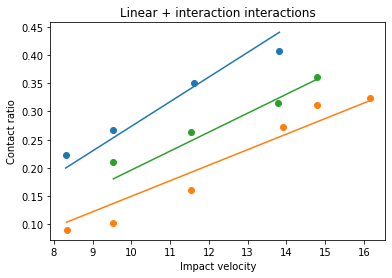

In [8]:
poly1 = PolynomialFeatures(2,interaction_only=True)
X_poly1 = poly1.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf1 = LinearRegression()
clf1.fit(X_poly1,Y)
mul_coeff = clf1.coef_
print(clf1.score(X_poly1,Y))
print(mul_coeff)
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf1.predict(X_poly1[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf1.predict(X_poly1[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf1.predict(X_poly1[8:12,:]))
plt.title('Linear + interaction interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [9]:
datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
numer = (datafile['DetTorque']*datafile['RPM (1/s)']) / (60*datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
datafile['velocity'] = np.sqrt(2*np.array(numer))
velocity = datafile['velocity']
lsratio = datafile['L/S Ratio']
inputframes = [velocity,lsratio]
inputframes = pd.concat(inputframes,axis=1)
X_poly_new = poly1.fit_transform(inputframes)
pre = np.abs(clf1.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly1.get_feature_names(inputframes.columns)

[0.07866509 0.07821238 0.07783394 0.07874655 0.07864271 0.07829595
 0.0785908  0.07904331 0.07877221 0.08794087 0.08693917 0.08619368
 0.0880007  0.0877971  0.08721388 0.08808311 0.08851366 0.08815731
 0.09694686 0.09594882 0.09514141 0.09749101 0.09714841 0.09670921
 0.09726006 0.09762634 0.097726   0.07811848 0.07761525 0.07718339
 0.07970205 0.07896121 0.07858923 0.07836244 0.07847011 0.07795637
 0.08704727 0.08630903 0.08565171 0.08717502 0.08731561 0.086707
 0.08629251 0.08716586 0.08686322 0.09609986 0.09512484 0.09414098
 0.09556734 0.09584221 0.09525122 0.09561823 0.09572613 0.09607428
 0.26618006 0.26937918 0.21688584 0.27238442 0.27438288 0.24238971
 0.27368134 0.28783554 0.27486403 0.24591595 0.30898141 0.46932085
 0.25905033 0.31573174 0.45093925 0.24873224 0.31299769 0.46435411
 0.10236795 0.10609174 0.10036358 0.10384874 0.10069482 0.10462277
 0.10581126 0.10105625 0.10338363 0.10368658 0.10342082 0.0987572
 0.10194217 0.10380613 0.0851842  0.07704078 0.07182954 0.0637406

['1', 'velocity', 'L/S Ratio', 'velocity L/S Ratio']

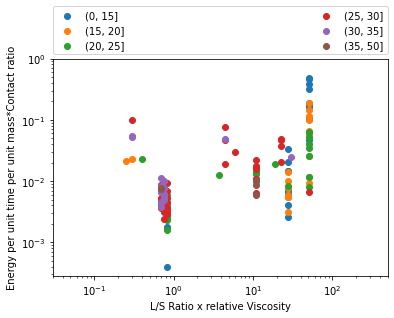

In [10]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
plt.yticks([1e-3,1e-2,1e-1,1])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [11]:
X_poly_new = poly.fit_transform(inputframes)
pre = np.abs(clf.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly.get_feature_names(inputframes.columns)

[ 0.26012408  0.25669543  0.25384578  0.26074333  0.2599541   0.25732676
  0.25956     0.26300524  0.2609386   0.2721155   0.26752887  0.26413722
  0.27239053  0.27145513  0.26878336  0.27276956  0.27475347  0.27311101
  0.27703911  0.27369837  0.27100728  0.27886719  0.27771565  0.27624218
  0.2780907   0.27932254  0.27965809  0.255987    0.25220586  0.2489819
  0.26805972  0.26237853  0.25954811  0.25782958  0.25864473  0.25476604
  0.2680222   0.2646608   0.26168317  0.26860573  0.26924854  0.2664706
  0.2645858   0.26856386  0.26718249  0.27420296  0.27095216  0.26768703
  0.27242564  0.27334246  0.27137268  0.27259527  0.27295512  0.27411747
  1.30365016  1.29626247  1.4290182   1.28939757  1.28487216  1.3613166
  1.28645718  1.25520839  1.28378731  0.26307304  1.21122472 -2.90807413
  0.252681    1.1978189  -2.88895206  0.26081298  1.20321309 -2.90291577
  0.26634868  0.27619554  0.26109824  0.27024989  0.26196352  0.27229667
  0.27544964  0.26290876  0.26902247  0.26982174  0.26

['1',
 'velocity',
 'L/S Ratio',
 'velocity^2',
 'velocity L/S Ratio',
 'L/S Ratio^2']

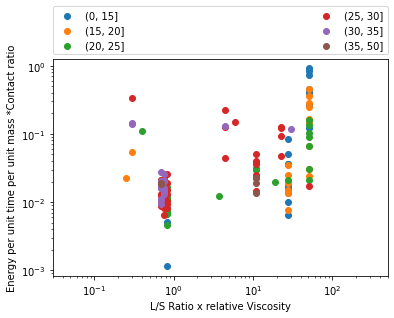

In [12]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [13]:
print(1/ratio)


[ 3.84431916  3.8956673   3.93939979  3.83518917  3.84683293  3.88610963
  3.85267373  3.80220566  3.83231918  3.67491014  3.73791439  3.78591092
  3.67119955  3.68385013  3.72046847  3.6660982   3.63962649  3.66151479
  3.60959868  3.65365713  3.68993774  3.58593644  3.60080537  3.62001202
  3.59594911  3.58009061  3.57579506  3.90644835  3.96501493  4.01635622
  3.73051196  3.81128746  3.85285031  3.87853097  3.8663072   3.92516995
  3.73103419  3.77842134  3.82141507  3.72292877  3.71404061  3.75275925
  3.77949227  3.72350917  3.74276028  3.64693366  3.69068836  3.7357058
  3.67072647  3.65841448  3.68496936  3.66844222  3.66360594  3.64807097
  0.76707696  0.7714487   0.69978115  0.77555598  0.77828754  0.73458297
  0.77732863  0.79668046  0.77894523  3.80122576  0.82561062 -0.34387019
  3.95755913  0.83485075 -0.34614628  3.83416498  0.83110798 -0.34448123
  3.75447699  3.62062326  3.82997605  3.70027907  3.81732544  3.67246505
  3.63042769  3.80360085  3.71716158  3.70615063  3.